In [1]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_128x128.png')

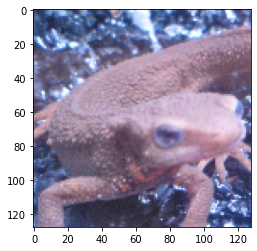

In [2]:
plt.imshow(img)

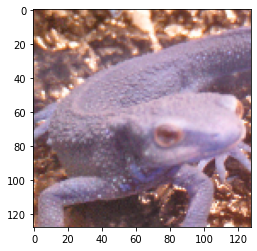

In [3]:
#Q1
img1 = img[:, :, ::-1] #::-1で逆順に入れ替え,openCVではBGR
plt.imshow(img1)

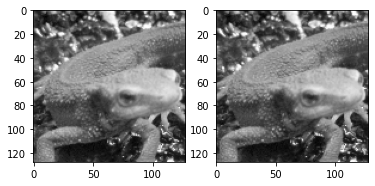

In [4]:
#Q2

img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2, cmap = 'gray')


img2_2 = 0.2126*img[:,:,0] + 0.7152*img[:, :, 1] + 0.0722*img[:, :, 2]
plt.subplot(1,2,2)
plt.imshow(img2_2, cmap = 'gray')

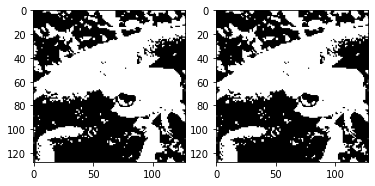

In [5]:
#Q3

img3 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img3 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(img3, cmap = 'gray')



img3_2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
width, height = img3_2.shape
for i in range(height):
    for j in range(width):
        if img3_2[i][j] >= 128:
            img3_2[i][j] = 255
        else:
            img3_2[i][j] = 0

            
plt.subplot(1,2,2)
plt.imshow(img3_2, cmap = 'gray')

C:\Users\shoko\anaconda3\envs\CSexperiment\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shoko\anaconda3\envs\CSexperiment\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


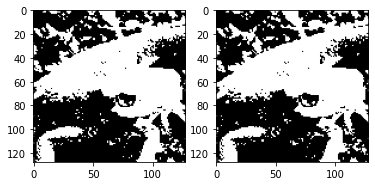

In [6]:
#Q4
import numpy as np

img4 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_,img4 = cv2.threshold(img4, 0, 255, cv2.THRESH_OTSU)


def otsu(image, th):
    
    arr1 = []
    arr2 = []
    
    for i in image:
        if i < th:
            arr1 = np.append(arr1, i)
        else:
            arr2 = np.append(arr2, i)
    
    omega1 = len(arr1)
    omega2 = len(arr2)
    
    m1 = np.mean(arr1)
    m2 = np.mean(arr2)
    
    sigmab = (omega1*omega2*((m1 - m2)**2))/((omega1+omega2)**2)
    
    return sigmab
    
        
        
img4_2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img4_2 = np.reshape(img4_2, (width*height))

th = -100
val = -100

for i in range(256):
    tmp = otsu(img4_2, i)
    if tmp > val:
        th = i-1
        val = tmp
        
img4_2 = np.reshape(img4_2, (width, height))
_, img4_2 = cv2.threshold(img4_2,th,255,cv2.THRESH_BINARY)


plt.subplot(1,2,1)
plt.imshow(img4, cmap = 'gray') 
plt.subplot(1,2,2)
plt.imshow(img4_2, cmap = 'gray')

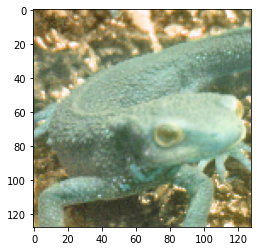

In [7]:
#Q5
img5 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img5[:, :, 0] = (img5[:, :, 0] + 180/2)%180
img5 = cv2.cvtColor(img5, cv2.COLOR_HSV2RGB)

plt.imshow(img5)

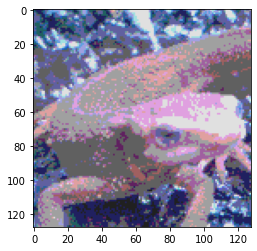

In [8]:
#Q6
img6= img.copy()
for i in range(height):
    for j in range(width):
        for k in range(3):
            val = img6[i][j][k]
            if 0 <= val and val < 63:
                img6[i][j][k] = 32
            elif 63 <= val and val < 127:
                img6[i][j][k] = 96
            elif 127 <= val and val < 191:
                img6[i][j][k] = 160
            else:
                img6[i][j][k] = 224
plt.imshow(img6)

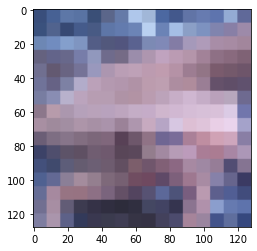

In [9]:
#Q7
def average_pooling(x, image):
    for i in range(x,height+x, x):
        for j in range(x,width+x, x):
            for k in range(3):
                fil = image[(i-x):i,(j-x):j,k]
                image[(i-x):i,(j-x):j,k] = np.mean(fil)
       
    return image

img7 = img.copy()
img7 = average_pooling(8, img7)
plt.imshow(img7)

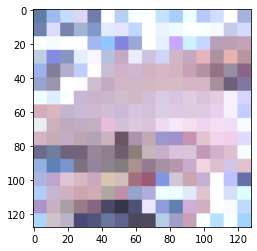

In [10]:
#Q8
def max_pooling(x, image):
    for i in range(x,height+x, x):
        for j in range(x,width+x, x):
            for k in range(3):
                fil = image[(i-x):i,(j-x):j,k]
                image[(i-x):i,(j-x):j,k] = np.max(fil)
       
    return image

img8 = img.copy()
img8 = max_pooling(8, img8)
plt.imshow(img8)

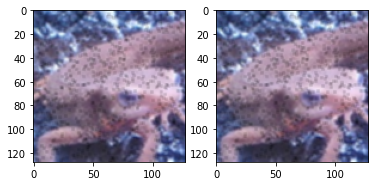

In [11]:
#Q9
img_noise = io.imread('https://kiyalab-tmu.github.io/rinko2021/figs/imori_noise.jpg')

def Gfilter(x, sigma):
    h = np.zeros((x,x))
    for i in range(x):
        for j in range(x):
            h[i][j] = (1/(2*np.pi*sigma**2))*np.exp(-((i-x//2)**2+(j-x//2)**2)/(2*sigma**2))
    h = h/np.sum(h)
    return h

def Gfiltering(img, x, sigma):
    H = Gfilter(x, sigma)
    width, height, ch = img.shape
    padding = np.zeros(((width+2, height+2, 3)))
    ans = np.zeros(((width, height, 3)))
    for i in range(width):
        for j in range(height):
            for k in range(ch):
                padding[i+1][j+1][k] = img[i][j][k]
    
    for i in range(width):
        for j in range(height):
            for k in range(ch):
                 ans[i][j][k] = int(np.sum((padding[i:i+x,j:j+x,k]* H)))
    
    return ans.astype(int)

img9 = img_noise.copy()
img9 = cv2.GaussianBlur(img9, (3, 3), 1.3)
plt.subplot(1, 2, 1)
plt.imshow(img9)

img9_1 = img_noise.copy()
img9_1 = Gfiltering(img9_1, 3, 1.3)
plt.subplot(1, 2, 2)
plt.imshow(img9)

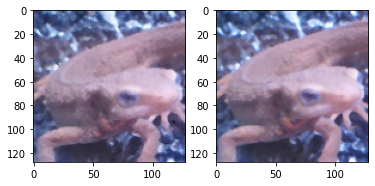

In [12]:
#Q10
def medianFilter(x, img):
    
    width, height, ch = img.shape
    ans = np.zeros(((width, height, ch)))
    
    for i in range(width):
        for j in range(height):
            for k in range(ch):
                ans[i][j][k] = np.median(img[i:i+x,j:j+x,k])
                
    return ans.astype(int)

img10 = img.copy()
img10 = cv2.medianBlur(img_noise, 3)
plt.subplot(1, 2, 1)
plt.imshow(img10)

img10_1 = img.copy()
img10_1 = medianFilter(3, img10_1)
plt.subplot(1, 2, 2)
plt.imshow(img10_1)